### **Importing Libraries and Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
print(train_data.head())

   id        date country              store             product  num_sold
0   0  2010-01-01  Canada  Discount Stickers   Holographic Goose       NaN
1   1  2010-01-01  Canada  Discount Stickers              Kaggle     973.0
2   2  2010-01-01  Canada  Discount Stickers        Kaggle Tiers     906.0
3   3  2010-01-01  Canada  Discount Stickers            Kerneler     423.0
4   4  2010-01-01  Canada  Discount Stickers  Kerneler Dark Mode     491.0


In [ ]:
print(test_data.head())

       id        date country              store             product
0  230130  2017-01-01  Canada  Discount Stickers   Holographic Goose
1  230131  2017-01-01  Canada  Discount Stickers              Kaggle
2  230132  2017-01-01  Canada  Discount Stickers        Kaggle Tiers
3  230133  2017-01-01  Canada  Discount Stickers            Kerneler
4  230134  2017-01-01  Canada  Discount Stickers  Kerneler Dark Mode


In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216681 entries, 0 to 216680
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        216681 non-null  int64  
 1   date      216681 non-null  object 
 2   country   216681 non-null  object 
 3   store     216681 non-null  object 
 4   product   216680 non-null  object 
 5   num_sold  208252 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB
None


In [ ]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98550 entries, 0 to 98549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       98550 non-null  int64 
 1   date     98550 non-null  object
 2   country  98550 non-null  object
 3   store    98550 non-null  object
 4   product  98550 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


### Data Cleaning

In [ ]:
print(train_data.isnull().sum())

id             0
date           0
country        0
store          0
product        1
num_sold    8429
dtype: int64


In [ ]:
print(test_data.isnull().sum())

id         0
date       0
country    0
store      0
product    0
dtype: int64


In [ ]:
# Convert the 'date' column in train_data and test_data to datetime format.
# The format is specified as 'YYYY-MM-DD', and any invalid dates will be set to NaT (Not a Time) using errors='coerce'.
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y-%m-%d', errors='coerce')
test_data['date'] = pd.to_datetime(test_data['date'], format='%Y-%m-%d', errors='coerce')


In [ ]:
# Remove rows with missing or invalid dates (NaT) in the 'date' column from both
# train_data and test_data.
train_data = train_data.dropna(subset=['date'])
test_data = test_data.dropna(subset=['date'])

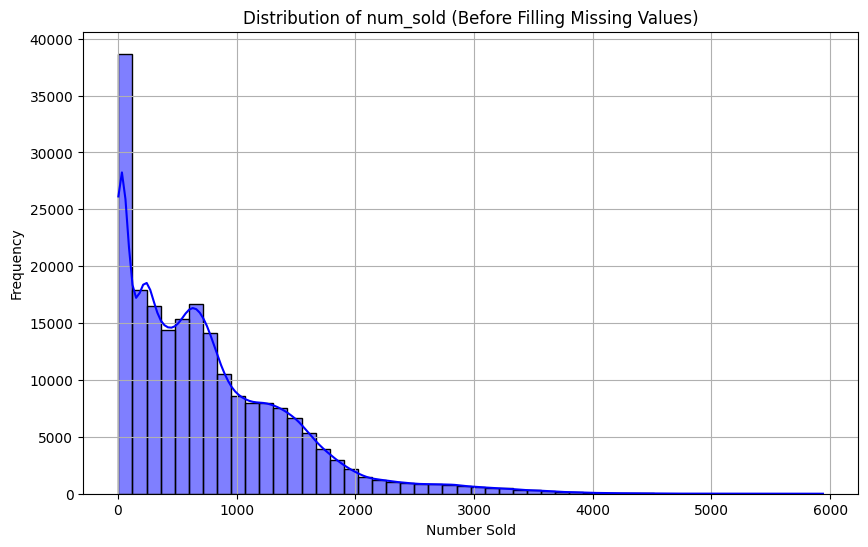

In [ ]:
# Plot the distribution of 'num_sold' before filling missing values
plt.figure(figsize=(10, 6))
sns.histplot(train_data['num_sold'], kde=True, bins=50, color='blue')
plt.title('Distribution of num_sold (Before Filling Missing Values)')
plt.xlabel('Number Sold')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

 Here in Distribution Shape, We can see that the distribution is skewed, the mean shifts toward the tail so it is very sensitive to outliers.
 So here we are going the replace the missing values with the median.

 Plot the distribution of the 'num_sold' variable to visualize its frequency and pattern.
 The histogram shows the frequency of sales numbers, and the density curve indicates the overall distribution.
 Observations:
 1. The distribution is right-skewed, with most sales values concentrated between 0 and 1000.
 2. There are some outliers or extreme values with very high sales numbers.
 3. This visualization helps understand the typical sales patterns and identify anomalies for further analysis.


In [ ]:
# Replacing the missing values with the median.
train_data['num_sold'].fillna(train_data['num_sold'].median(), inplace=True)


<ipython-input-14-e93f5194a15b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['num_sold'].fillna(train_data['num_sold'].median(), inplace=True)


In [ ]:
print(train_data.isnull().sum())

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64


### **EDA**

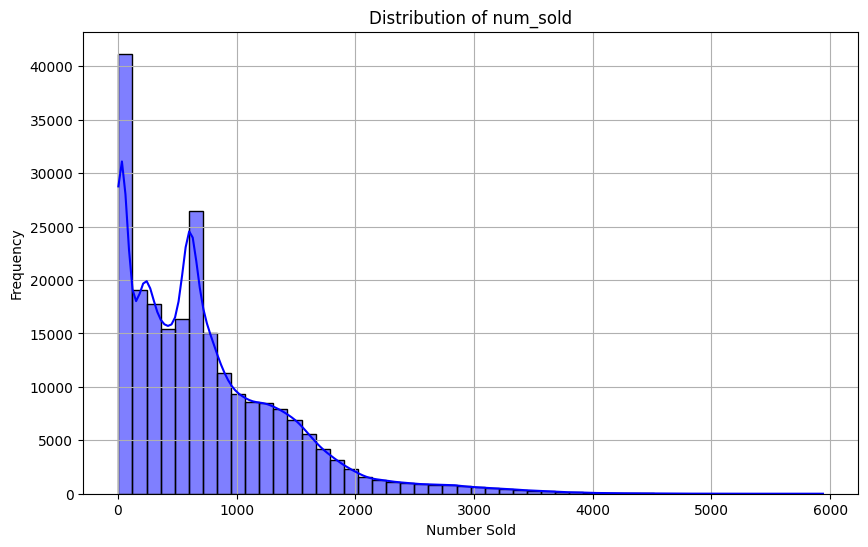

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['num_sold'], kde=True, bins=50, color='blue')
plt.title('Distribution of num_sold')
plt.xlabel('Number Sold')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

 Re-plot the distribution of 'num_sold' after removing rows with missing or invalid values.
 This ensures only valid data points are visualized.
 Observations:
 1. The distribution remains right-skewed, with most sales numbers concentrated in the lower range (0–1000).
 2. The removal of missing values ensures the dataset is clean and ready for analysis.


<ipython-input-15-39e89b465ba6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='country', y='num_sold', palette='Set2')


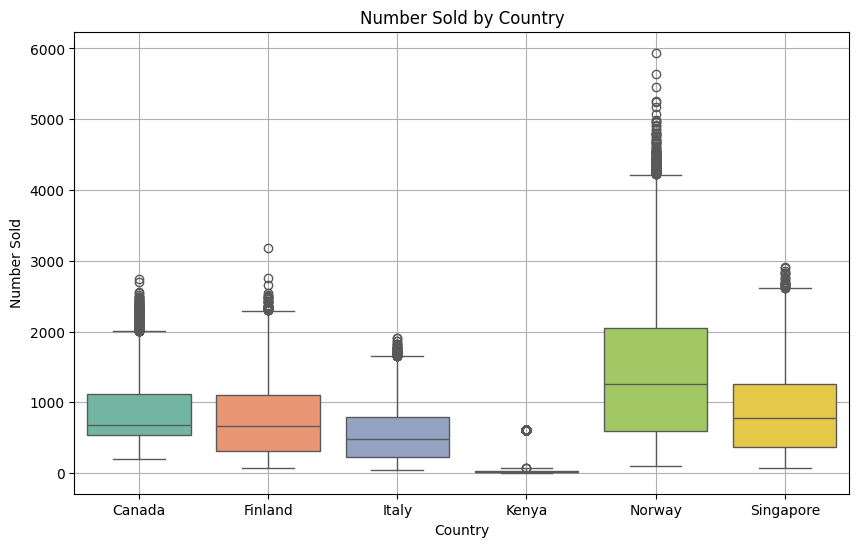

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='country', y='num_sold', palette='Set2')
plt.title('Number Sold by Country')
plt.xlabel('Country')
plt.ylabel('Number Sold')
plt.grid(True)
plt.show()

 Create a boxplot to compare the distribution of 'num_sold' across different countries.
 Observations:
 1. Norway has the highest median and largest variability in sales.
 2. Kenya has the lowest median and least variability, with consistently low sales numbers.
 3. Outliers are present in all countries, representing unusually high sales events.
 4. This plot highlights sales patterns and differences across countries, aiding in market-specific analysis.


<ipython-input-16-af278d0f3539>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='store', y='num_sold', palette='Set3')


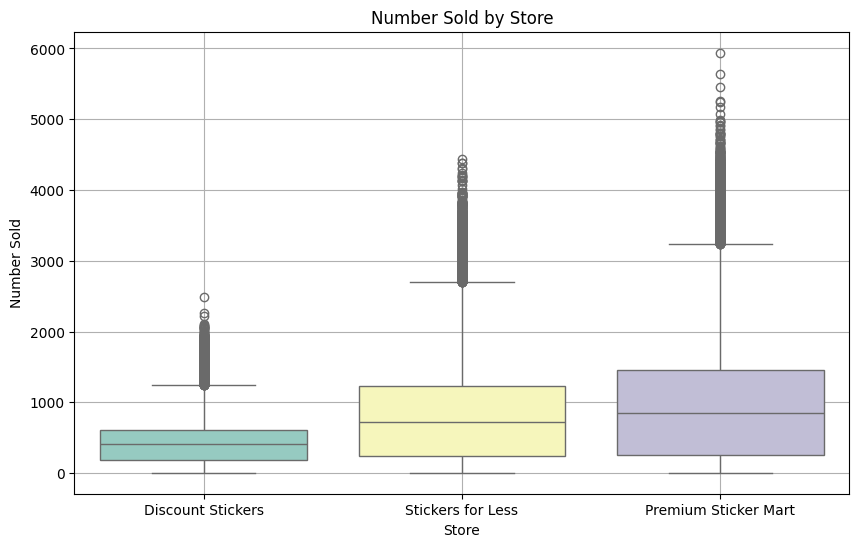

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='store', y='num_sold', palette='Set3')
plt.title('Number Sold by Store')
plt.xlabel('Store')
plt.ylabel('Number Sold')
plt.grid(True)
plt.show()

 Created a boxplot to compare the distribution of 'num_sold' across different store types.
 Observations:
 1. 'Stickers for Less Store' has the highest median sales, followed by 'Premium Sticker Mart'.
 2. 'Discount Stickers' has the lowest median and most consistent sales.
 3. Outliers are present for all store types, with 'Premium Sticker Mart' having the most extreme values.
 4. This plot highlights differences in sales patterns and variability across store types.


<ipython-input-17-8776358392e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='product', y='num_sold', palette='Set1')


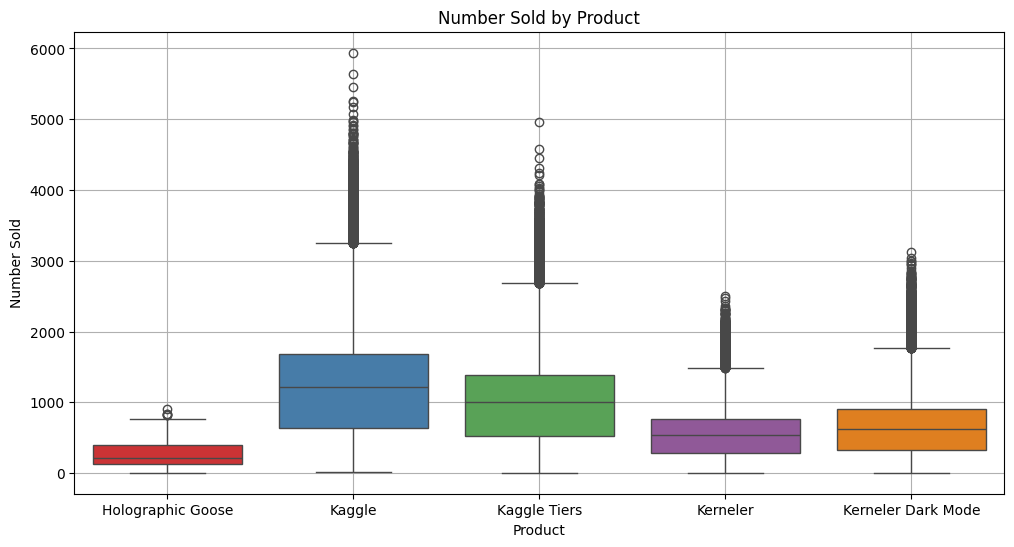

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='product', y='num_sold', palette='Set1')
plt.title('Number Sold by Product')
plt.xlabel('Product')
plt.ylabel('Number Sold')
plt.grid(True)
plt.show()

#
 Create a boxplot to compare the distribution of 'num_sold' across different product categories.
 Observations:
 1. 'Kaggle Tiers' and 'Kaggle' have the highest median sales and the greatest variability in sales.
 2. 'Holographic Goose' has the lowest median sales and the most consistent sales range.
 3. All products have outliers, with 'Kaggle Tiers' and 'Kaggle' showing the most extreme sales events.
 4. This plot highlights sales patterns and variability across product categories, aiding in product performance analysis.


<ipython-input-18-aa651c158bc6>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train_data, x='date', y='num_sold', ci=None, color='orange')


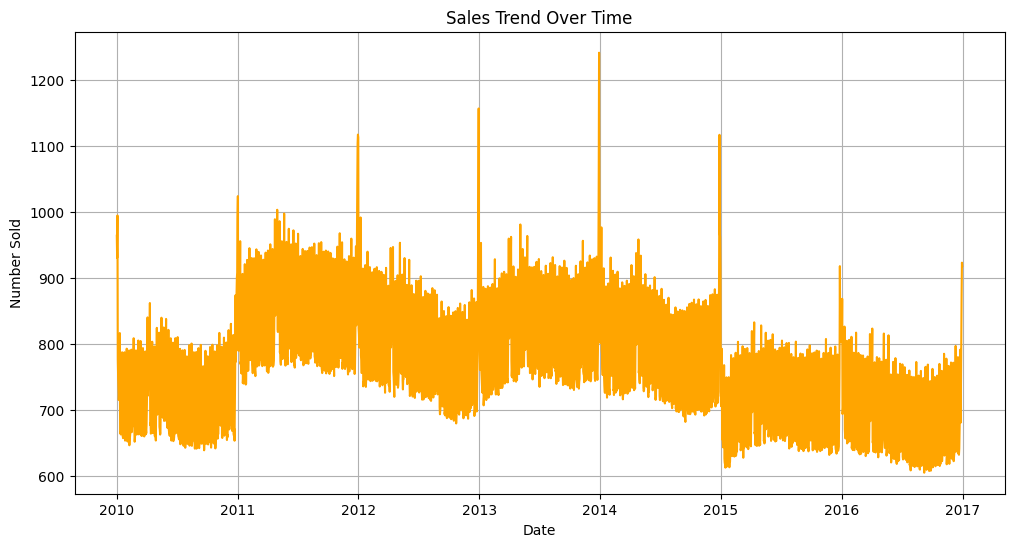

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data, x='date', y='num_sold', ci=None, color='orange')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.grid(True)
plt.show()

 Plot the sales trend over time to identify patterns and variability.
 Observations:
 1. The data shows clear seasonality, with consistent peaks and troughs over time.
 2. Sales typically range between 700 and 1000, with occasional spikes exceeding 1200.
 3. No significant long-term upward or downward trend is visible; sales remain stable across years.
 4. Spikes likely represent holiday periods, promotions, or events driving high demand.
 This visualization can help forecast future sales and identify factors influencing seasonal trends.


<ipython-input-19-dff07697f30e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train_data, x='country', y='num_sold', hue='store', ci=None, palette='muted')


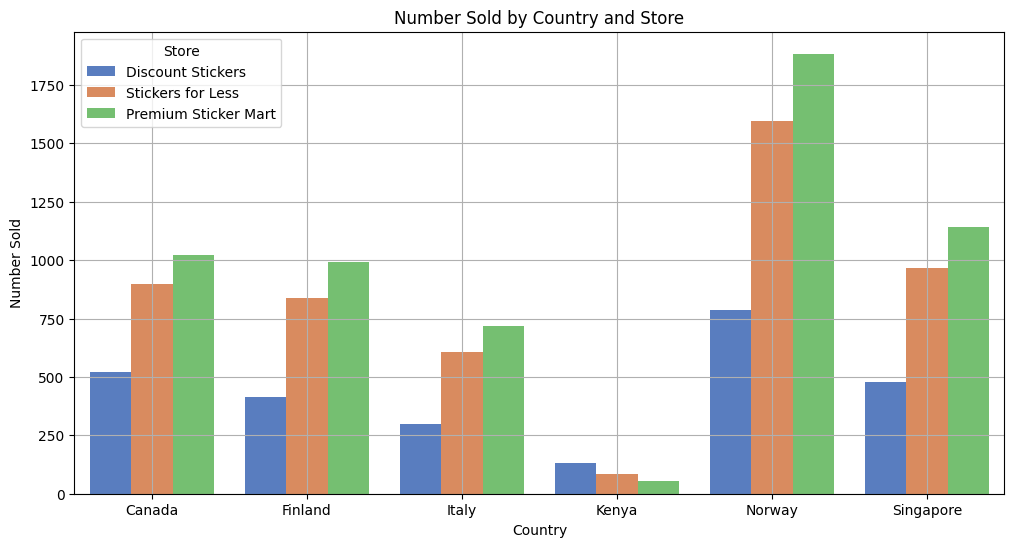

In [ ]:
# 1. Sales by Country and Store
plt.figure(figsize=(12, 6))
sns.barplot(data=train_data, x='country', y='num_sold', hue='store', ci=None, palette='muted')
plt.title('Number Sold by Country and Store')
plt.xlabel('Country')
plt.ylabel('Number Sold')
plt.legend(title='Store')
plt.grid(True)
plt.show()



 Create a grouped bar chart to compare the number of items sold across countries and store types.
 Observations:
 1. 'Premium Sticker Mart' has the highest sales in most countries, followed by 'Stickers for Less' and 'Discount Stickers'.
 2. Norway has the highest sales across all store types, while Kenya has the lowest.
 3. Countries like Canada, Finland, and Singapore show similar sales patterns, with Premium Sticker Mart dominating.
 4. This chart highlights the performance of store types in each country, aiding in identifying key markets and opportunities.


<ipython-input-20-cbfdbc5ae80c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train_data, x='date', y='num_sold', hue='product', ci=None, palette='Set2')


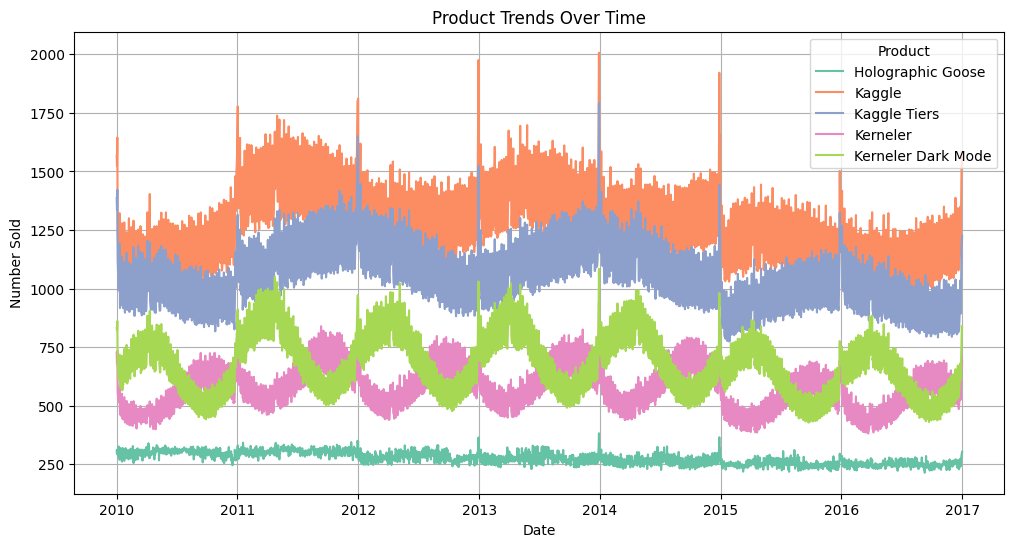

In [ ]:
# 2. Product Trends Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data, x='date', y='num_sold', hue='product', ci=None, palette='Set2')
plt.title('Product Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.legend(title='Product')
plt.grid(True)
plt.show()



 Plot the sales trends of different products over time to analyze performance and seasonality.
 Observations:
 1. 'Kaggle' and 'Kaggle Tiers' have the highest sales, with regular peaks indicating seasonal demand.
 2. 'Holographic Goose' has the lowest sales, with no significant spikes.
 3. 'Kerneler' and 'Kerneler Dark Mode' exhibit moderate sales and follow similar seasonal patterns.
 4. All products show seasonality, with consistent peaks and troughs over the years.
 This visualization helps identify high-performing products and seasonal trends to optimize strategies.


### **Feature Engineering**

In [ ]:

# 1. Extract date-related features
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['day'] = train_data['date'].dt.day
train_data['weekday'] = train_data['date'].dt.weekday

test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['day'] = test_data['date'].dt.day
test_data['weekday'] = test_data['date'].dt.weekday

# 2. Encode categorical variables
label_encoders = {}
categorical_columns = ['country', 'store', 'product']

for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])
    label_encoders[col] = le

# 3. Feature scaling (with separate handling for 'num_sold')
scaler = StandardScaler()
feature_columns = ['year', 'month', 'day', 'weekday']

# Scale features in train data
train_features = scaler.fit_transform(train_data[feature_columns])
train_data[feature_columns] = train_features

# Scale features in test data
test_features = scaler.transform(test_data[feature_columns])
test_data[feature_columns] = test_features

# Scale 'num_sold' separately in train data (if needed)
train_data['num_sold'] = StandardScaler().fit_transform(train_data[['num_sold']])

# Check the transformed datasets
print("Transformed Train Data:")
print(train_data.head())

print("\nTransformed Test Data:")
print(test_data.head())


Transformed Train Data:
   id       date  country  store  product  num_sold     month      year  \
0   0 2010-01-01        0      0        0 -0.209412 -1.601267 -1.500245   
1   1 2010-01-01        0      0        1  0.333900 -1.601267 -1.500245   
2   2 2010-01-01        0      0        2  0.234982 -1.601267 -1.500245   
3   3 2010-01-01        0      0        3 -0.478116 -1.601267 -1.500245   
4   4 2010-01-01        0      0        4 -0.377721 -1.601267 -1.500245   

        day   weekday  
0 -1.673848  0.499487  
1 -1.673848  0.499487  
2 -1.673848  0.499487  
3 -1.673848  0.499487  
4 -1.673848  0.499487  

Transformed Test Data:
       id       date  country  store  product      year     month       day  \
0  230130 2017-01-01        0      0        0  1.999414 -1.601267 -1.673848   
1  230131 2017-01-01        0      0        1  1.999414 -1.601267 -1.673848   
2  230132 2017-01-01        0      0        2  1.999414 -1.601267 -1.673848   
3  230133 2017-01-01        0      0     

In [ ]:


# 1. Define features and target variable
X = train_data[['year', 'month', 'day', 'weekday', 'country', 'store', 'product']]
y = train_data['num_sold']

# 2. Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on validation set
y_pred_linear = linear_model.predict(X_val)

# Evaluate Linear Regression
rmse_linear = np.sqrt(mean_squared_error(y_val, y_pred_linear))
print(f"Linear Regression RMSE: {rmse_linear:.2f}")

# 4. Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on validation set
y_pred_rf = rf_model.predict(X_val)

# Evaluate Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf:.2f}")

# 5. Choose the best model (based on RMSE) for further testing or tuning
best_model = rf_model if rmse_rf < rmse_linear else linear_model


Linear Regression RMSE: 0.96
Random Forest RMSE: 0.11


In [ ]:


# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return rmse

# Initialize models
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Evaluate each model
model_performance = {}
for name, model in models.items():
    rmse = evaluate_model(model, X_train, y_train, X_val, y_val)
    model_performance[name] = rmse
    print(f"{name} RMSE: {rmse:.2f}")



Gradient Boosting RMSE: 0.29
XGBoost RMSE: 0.10

Best Model: XGBoost with RMSE: 0.10


 Compare the RMSE values of different models to evaluate their performance:
 RMSE (Root Mean Square Error) measures the average magnitude of prediction errors.
 A lower RMSE indicates better performance.
 Model Performance:
 1. Linear Regression RMSE: 0.96 - Performs the worst; not suitable for this dataset due to high error.
 2. Random Forest RMSE: 0.11 - Performs well, capturing non-linear relationships effectively.
 3. Gradient Boosting RMSE: 0.29 - Performs better than Linear Regression but requires optimization.
 4. XGBoost RMSE: 0.10 - Best performing model with the lowest error, making it the most suitable for this dataset.


In [ ]:
# Convert data into DMatrix for XGBoost
X_train_cv, X_val_cv, y_train_cv, y_val_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train_cv, label=y_train_cv)
dval = xgb.DMatrix(X_val_cv, label=y_val_cv)

# Parameter grid for tuning
param_grid = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Cross-validation to find the best number of trees
cv_results = xgb.cv(
    params=param_grid,
    dtrain=dtrain,
    num_boost_round=500,
    nfold=3,
    metrics='rmse',
    early_stopping_rounds=10,
    as_pandas=True,
    seed=42
)

# Extract the best number of rounds
best_num_boost_round = cv_results['test-rmse-mean'].idxmin() + 1
print(f"Best number of boosting rounds: {best_num_boost_round}")

# Train the model with the best parameters
final_model = xgb.train(
    params=param_grid,
    dtrain=dtrain,
    num_boost_round=best_num_boost_round
)

# Evaluate the model on validation data
y_pred = final_model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val_cv, y_pred))
print(f"Final Model RMSE on Validation Data: {rmse:.2f}")


Best number of boosting rounds: 500
Final Model RMSE on Validation Data: 0.10


In [ ]:
# Prepare test dataset with the same features used for training
X_test = test_data[['year', 'month', 'day', 'weekday', 'country', 'store', 'product']]

# Convert to XGBoost DMatrix format
dtest = xgb.DMatrix(X_test)

# Predict using the tuned XGBoost model
test_predictions = final_model.predict(dtest)

# Create a submission DataFrame
submission = test_data[['id']].copy()
submission['num_sold'] = test_predictions

# Save predictions to a CSV file
submission.to_csv('xgboost_test_predictions.csv', index=False)

print("Predictions saved to 'xgboost_test_predictions.csv'")


Predictions saved to 'xgboost_test_predictions.csv'


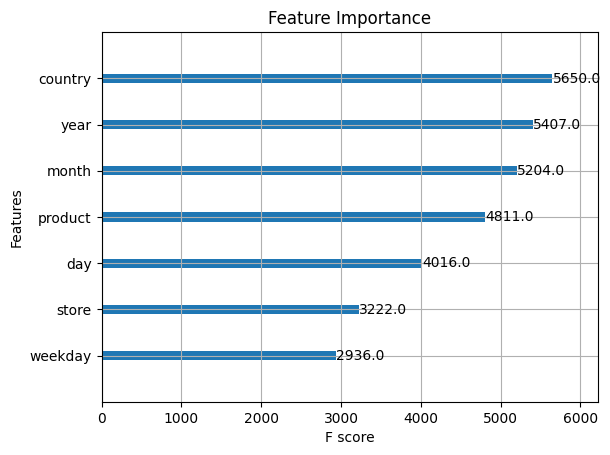

In [ ]:
# Plot feature importance
xgb.plot_importance(final_model, importance_type='weight', max_num_features=10, title="Feature Importance")
plt.show()


 Visualize feature importance to understand the impact of each feature on the model's predictions.
 Observations:
 1. 'country', 'year', and 'month' are the most important features, with the highest F scores, indicating their strong influence on predictions.
 2. 'product' and 'day' are moderately important.
 3. 'store' and 'weekday' have lower importance, suggesting a relatively minor impact on the model.
 This analysis helps in feature selection and interpretation of the model's decision-making process.


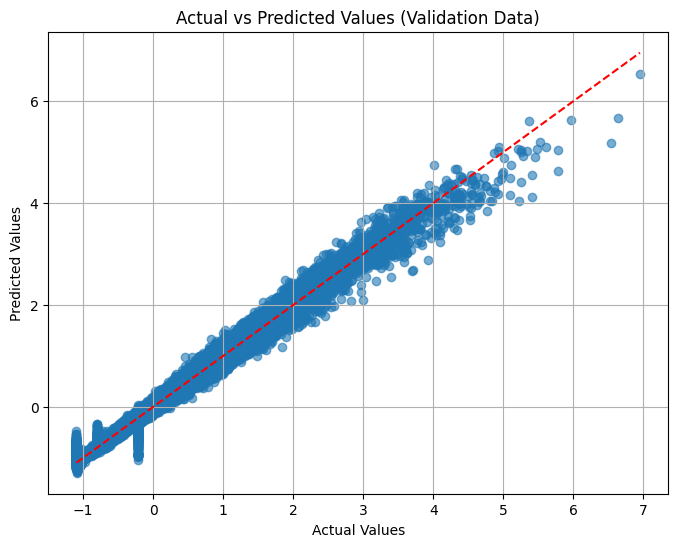

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_val_cv, y_val_pred, alpha=0.6)
plt.plot([y_val_cv.min(), y_val_cv.max()], [y_val_cv.min(), y_val_cv.max()], 'r--')
plt.title('Actual vs Predicted Values (Validation Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


 Plot actual vs. predicted values for validation data to evaluate model performance.
 Observations:
 1. Most points are closely aligned with the ideal line (red dashed line), indicating accurate predictions.
 2. Deviations from the line represent prediction errors, which are more noticeable for extreme values.
 3. The model performs well in the mid-range values (0 to 4) but shows slight inaccuracies for higher and lower extremes.
 This visualization helps identify the model's strengths and areas for improvement.


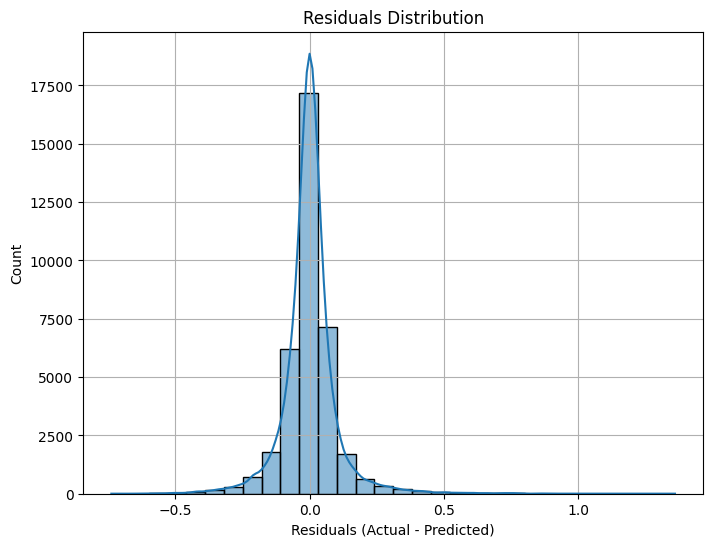

In [ ]:
# Calculate residuals
residuals = y_val_cv - y_val_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()


 Plot the residuals distribution to evaluate model errors.
 Observations:
 1. Residuals are centered around 0, indicating unbiased predictions.
 2. The distribution is symmetric and bell-shaped, suggesting normally distributed errors.
 3. Most residuals are small, with only minor deviations, showing good model performance.
 4. A slight skew on the positive side indicates the model may occasionally underestimate actual values.
 This analysis confirms that the model fits well and errors are random and normally distributed.
